In [1]:
import pandas as pd
import glob
import os

# Set your data path
bb_data_path = '../Data/Beyond Blue/'

# Find all posts and comments files
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

# Load and concatenate all posts and comments
bb_posts = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
bb_comments = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)

# Quick checks
print("Posts shape:", bb_posts.shape)
print("Comments shape:", bb_comments.shape)
print(bb_posts.head())
print(bb_comments.head())

Posts shape: (20003, 9)
Comments shape: (10155, 8)
   Post ID Category                              Post Title  \
0   555887  Anxiety            muscle tension crying relief   
1   555887  Anxiety            muscle tension crying relief   
2   581593  Anxiety                           burnout & gad   
3   581558  Anxiety                   dreading the new year   
4   581626  Anxiety  should i consider getting a therapist?   

                            Post Author   Post Date  \
0                               Johnny_  01-01-2023   
1                               Johnny_  01-01-2023   
2  More than my mental health condition  01-01-2024   
3                                 K-J-S  01-01-2024   
4              burntlibraryofalexandria  01-01-2024   

                                        Post Content  Support Count  \
0  hello everyone, happy new year!im hoping someo...              0   
1  hello everyone, happy new year!im hoping someo...              0   
2  i feel like i need some

In [3]:
print("Number of Beyond Blue posts:", bb_posts.shape[0])
print("Number of Beyond Blue comments:", bb_comments.shape[0])

Number of Beyond Blue posts: 20003
Number of Beyond Blue comments: 10155


In [4]:
import os
import glob
import pandas as pd

bb_data_path = '../Data/Beyond Blue/'
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

print("Beyond Blue posts per category:")
for f in posts_files:
    df = pd.read_csv(f)
    print(f"{os.path.basename(f)}: {df.shape[0]}")

print("\nBeyond Blue comments per category:")
for f in comments_files:
    df = pd.read_csv(f)
    print(f"{os.path.basename(f)}: {df.shape[0]}")

Beyond Blue posts per category:
posts_anxiety.csv: 1996
posts_depression.csv: 200
posts_Grief_loss.csv: 1725
posts_long_term_support.csv: 50
posts_Multiculture.csv: 506
posts_ptsd_trauma.csv: 2000
posts_relationships.csv: 2000
posts_Sex_identity.csv: 1526
posts_staying_well.csv: 2000
posts_suicidal_selfharm.csv: 2000
posts_supporting_friends.csv: 2000
posts_treatments.csv: 2000
posts_young_people.csv: 2000

Beyond Blue comments per category:
comments_anxiety.csv: 998
comments_depression.csv: 200
comments_Grief_loss.csv: 875
comments_long_term_support.csv: 50
comments_Multiculture.csv: 256
comments_ptsd_trauma.csv: 1000
comments_relationships.csv: 1000
comments_Sex_identity.csv: 776
comments_staying_well.csv: 1000
comments_suicidal_selfharm.csv: 1000
comments_supporting_friends.csv: 1000
comments_treatments.csv: 1000
comments_young_people.csv: 1000


In [2]:
import pandas as pd
import re

# Let's assume bb_posts and bb_comments are already loaded

# Clean posts
bb_posts_clean = bb_posts.drop_duplicates()
bb_posts_clean = bb_posts_clean.dropna(subset=['Post Content'])
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].str.lower().str.strip()
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Optional: parse date
bb_posts_clean['Date'] = pd.to_datetime(bb_posts_clean['Date'], errors='coerce')

# Clean comments
bb_comments_clean = bb_comments.drop_duplicates()
bb_comments_clean = bb_comments_clean.dropna(subset=['Comment Content'])
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].str.lower().str.strip()
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Optional: parse comment date
bb_comments_clean['Comment Date'] = pd.to_datetime(bb_comments_clean['Comment Date'], errors='coerce')

KeyError: 'Date'

In [6]:
import pandas as pd
import glob
import os
import re

# Paths
bb_data_path = '../Data/Beyond Blue/'
bb_output_path = '../output/bb_output/'

# Gather all category files
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

# Load and concatenate posts
bb_posts = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
print("Number of Beyond Blue posts:", bb_posts.shape[0])

# Load and concatenate comments
bb_comments = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)
print("Number of Beyond Blue comments:", bb_comments.shape[0])

# Optional: View columns
print("Posts columns:", bb_posts.columns.tolist())
print("Comments columns:", bb_comments.columns.tolist())

# --- Cleaning Posts ---

bb_posts_clean = bb_posts.drop_duplicates()
bb_posts_clean = bb_posts_clean.dropna(subset=['Post Content'])

# Standardize text: lowercase, strip, remove URLs, remove punctuation
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].str.lower().str.strip()
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Parse dates
bb_posts_clean['Post Date'] = pd.to_datetime(bb_posts_clean['Post Date'], errors='coerce')

# --- Cleaning Comments ---

bb_comments_clean = bb_comments.drop_duplicates()
bb_comments_clean = bb_comments_clean.dropna(subset=['Comment Content'])

bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].str.lower().str.strip()
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Parse comment dates
bb_comments_clean['Comment Date'] = pd.to_datetime(bb_comments_clean['Comment Date'], errors='coerce')

# --- Save Cleaned Data ---

bb_posts_clean.to_csv(os.path.join(bb_output_path, 'bb_posts_clean.csv'), index=False)
bb_comments_clean.to_csv(os.path.join(bb_output_path, 'bb_comments_clean.csv'), index=False)

print("Cleaned files saved:")
print(f"- {os.path.join(bb_output_path, 'bb_posts_clean.csv')}")
print(f"- {os.path.join(bb_output_path, 'bb_comments_clean.csv')}")

Number of Beyond Blue posts: 20003
Number of Beyond Blue comments: 10155
Posts columns: ['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content', 'Support Count', 'Total Number of Comments', 'Post URL']
Comments columns: ['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date', 'Comment Content', 'Comment Support', 'Post URL']
Cleaned files saved:
- ./bb_output/bb_posts_clean.csv
- ./bb_output/bb_comments_clean.csv


In [9]:
bb_posts_clean.to_csv('./bb_output/bb_posts_clean.csv', index=False)
bb_comments_clean.to_csv('./bb_output/bb_comments_clean.csv', index=False)

In [10]:
import pandas as pd
import os

# Paths
bb_output_path = '../output/bb_output/'

# Select sample size
sample_size = 10

# Create samples
bb_posts_sample = bb_posts_clean.head(sample_size)
bb_comments_sample = bb_comments_clean.head(sample_size)

# Save individual CSVs
bb_posts_sample.to_csv(os.path.join(bb_output_path, 'bb_posts_sample.csv'), index=False)
bb_comments_sample.to_csv(os.path.join(bb_output_path, 'bb_comments_sample.csv'), index=False)

# Combine and save as Excel (multiple sheets)
with pd.ExcelWriter(os.path.join(bb_output_path, 'bb_samples.xlsx')) as writer:
    bb_posts_sample.to_excel(writer, sheet_name='posts', index=False)
    bb_comments_sample.to_excel(writer, sheet_name='comments', index=False)

print("Sample files saved in bb_output:")
print("- bb_posts_sample.csv")
print("- bb_comments_sample.csv")
print("- bb_samples.xlsx")

Sample files saved in bb_output:
- bb_posts_sample.csv
- bb_comments_sample.csv
- bb_samples.xlsx


In [13]:
print("Total Beyond Blue posts:", bb_posts_clean.shape[0])
print("Total Beyond Blue comments:", bb_comments_clean.shape[0])
print("Post categories:", bb_posts_clean['Category'].unique())

Total Beyond Blue posts: 10155
Total Beyond Blue comments: 10154
Post categories: ['Anxiety' 'Depression' 'Grief and loss'
 'Long-term support over the journey' 'Multicultural experiences'
 'PTSD and trauma' 'Relationship and family issues'
 'Sexuality and gender identity' 'Staying well'
 'Suicidal thoughts and self-harm' 'Supporting family and friends'
 'Treatments, health professionals and therapies' 'Young people']


In [16]:
print("Sample Beyond Blue Posts:")
display(bb_posts_clean[['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content']].head(5))

print("Sample Beyond Blue Comments:")
display(bb_comments_clean[['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date', 'Comment Content']].head(5))

Sample Beyond Blue Posts:


,Post ID,Category,Post Title,Post Author,Post Date,Post Content
0,555887,Anxiety,muscle tension crying relief,Johnny_,2023-01-01,hello everyone happy new yearim hoping someone...
2,581593,Anxiety,burnout & gad,More than my mental health condition,2024-01-01,i feel like i need some support from people in...
3,581558,Anxiety,dreading the new year,K-J-S,2024-01-01,im wondering if anyone else feels like this i ...
4,581626,Anxiety,should i consider getting a therapist?,burntlibraryofalexandria,2024-01-01,every year around this time i get a huge exist...
5,581561,Anxiety,passive agression,Richju,2024-01-01,hi everyonei wonder if anyone has overcome the...


Sample Beyond Blue Comments:


,Comment ID,Post ID,Category,Comment Author,Comment Date,Comment Content
0,555887_c64bc84efa3,555887,anxiety,Johnny_,2023-01-01,hello everyone happy new yearim hoping someone...
1,581558_caeab9cd1ea,581558,anxiety,K-J-S,2024-01-01,im wondering if anyone else feels like this i ...
2,581593_c46908aa953,581593,anxiety,More than my mental health condition,2024-01-01,i feel like i need some support from people in...
3,581626_ccba749e49f,581626,anxiety,burntlibraryofalexandria,2024-01-01,every year around this time i get a huge exist...
4,581561_c6a4250e0d7,581561,anxiety,Richju,2024-01-01,hi everyonei wonder if anyone has overcome the...


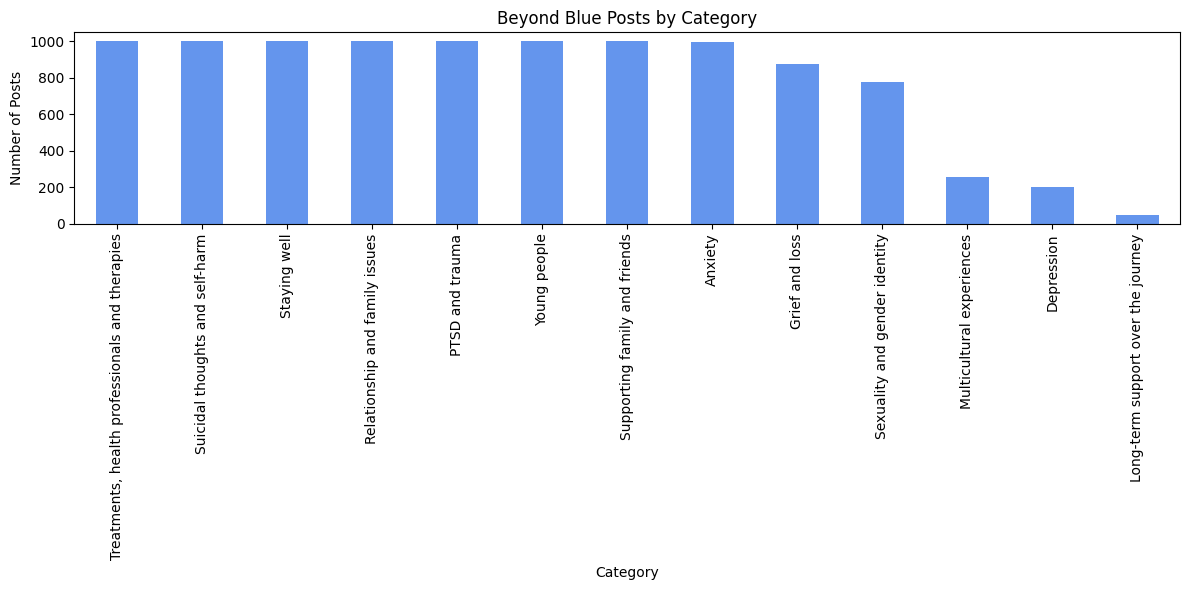

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bb_posts_clean['Category'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Beyond Blue Posts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.savefig('./bb_output/bb_posts_by_category.png')
plt.show()

Loaded Beyond Blue posts: (20003, 9)
Loaded Beyond Blue comments: (10155, 8)
Cleaned files saved in bb_output:
- bb_posts_clean.csv
- bb_comments_clean.csv
Sample files saved in bb_output:
- bb_posts_sample.csv
- bb_comments_sample.csv
- bb_samples.xlsx
Total Beyond Blue posts: 10155
Total Beyond Blue comments: 10154
Post categories: ['Anxiety' 'Depression' 'Grief and loss'
 'Long-term support over the journey' 'Multicultural experiences'
 'PTSD and trauma' 'Relationship and family issues'
 'Sexuality and gender identity' 'Staying well'
 'Suicidal thoughts and self-harm' 'Supporting family and friends'
 'Treatments, health professionals and therapies' 'Young people']
Comment categories: ['anxiety' 'depression' 'Grief_loss' 'long_term_support' 'Multiculture'
 'ptsd_trauma' 'relationships' 'Sex_identity' 'staying_well'
 'suicidal_selfharm' 'supporting_friends' 'treatments' 'young_people']
Sample Cleaned Beyond Blue Posts:


,Post ID,Category,Post Title,Post Author,Post Date,Post Content
0,555887,Anxiety,muscle tension crying relief,Johnny_,2023-01-01,hello everyone happy new yearim hoping someone...
2,581593,Anxiety,burnout & gad,More than my mental health condition,2024-01-01,i feel like i need some support from people in...
3,581558,Anxiety,dreading the new year,K-J-S,2024-01-01,im wondering if anyone else feels like this i ...
4,581626,Anxiety,should i consider getting a therapist?,burntlibraryofalexandria,2024-01-01,every year around this time i get a huge exist...
5,581561,Anxiety,passive agression,Richju,2024-01-01,hi everyonei wonder if anyone has overcome the...


Sample Cleaned Beyond Blue Comments:


,Comment ID,Post ID,Category,Comment Author,Comment Date,Comment Content
0,555887_c64bc84efa3,555887,anxiety,Johnny_,2023-01-01,hello everyone happy new yearim hoping someone...
1,581558_caeab9cd1ea,581558,anxiety,K-J-S,2024-01-01,im wondering if anyone else feels like this i ...
2,581593_c46908aa953,581593,anxiety,More than my mental health condition,2024-01-01,i feel like i need some support from people in...
3,581626_ccba749e49f,581626,anxiety,burntlibraryofalexandria,2024-01-01,every year around this time i get a huge exist...
4,581561_c6a4250e0d7,581561,anxiety,Richju,2024-01-01,hi everyonei wonder if anyone has overcome the...


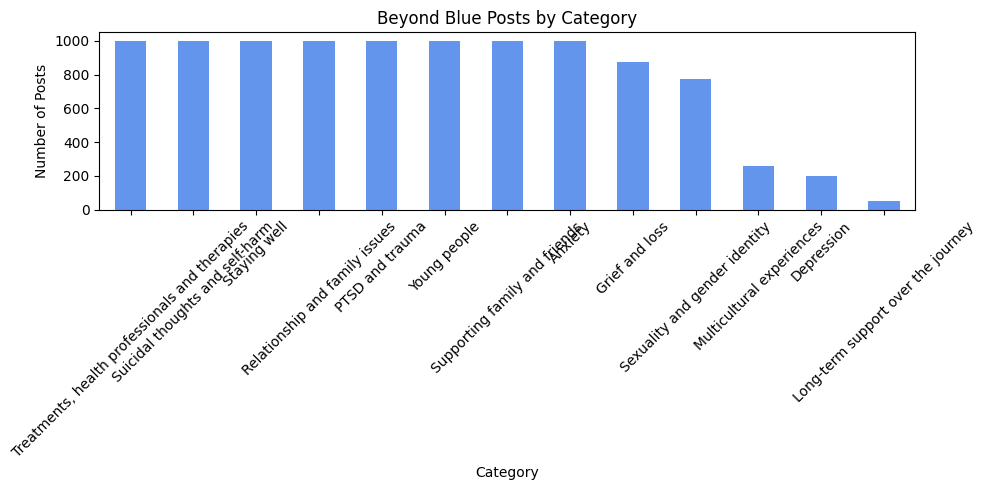

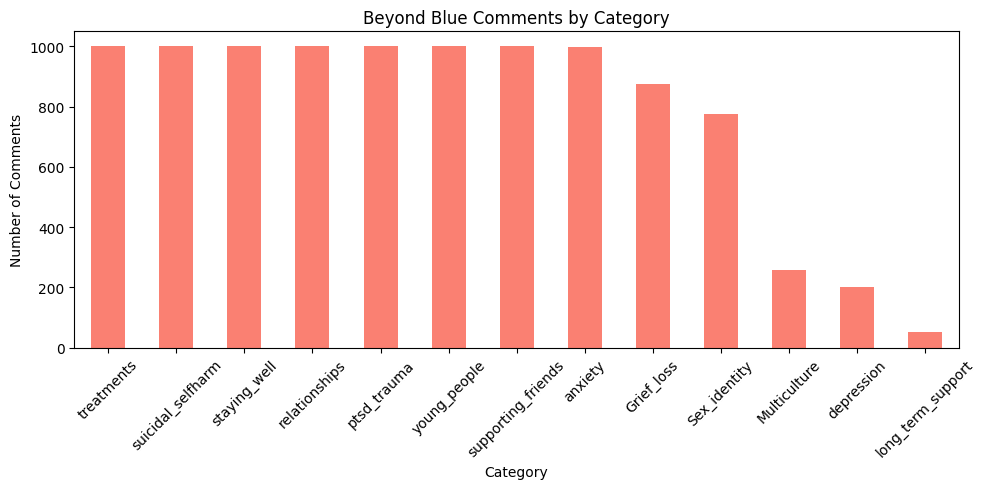

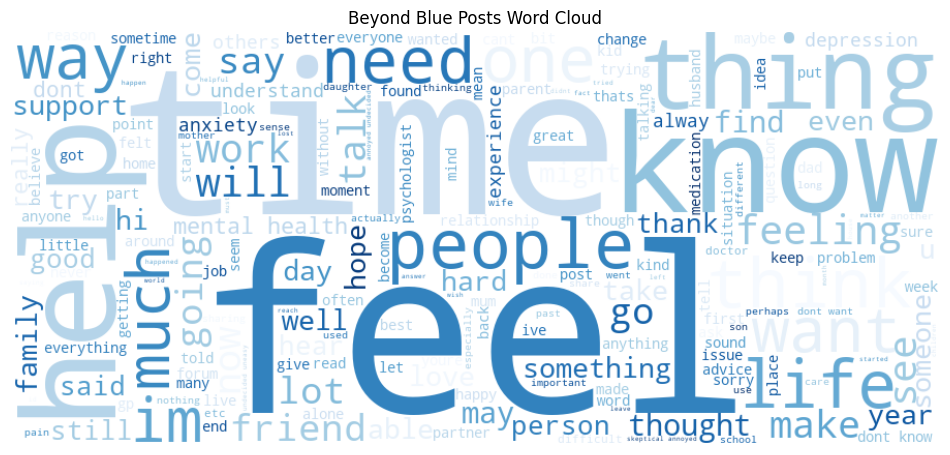

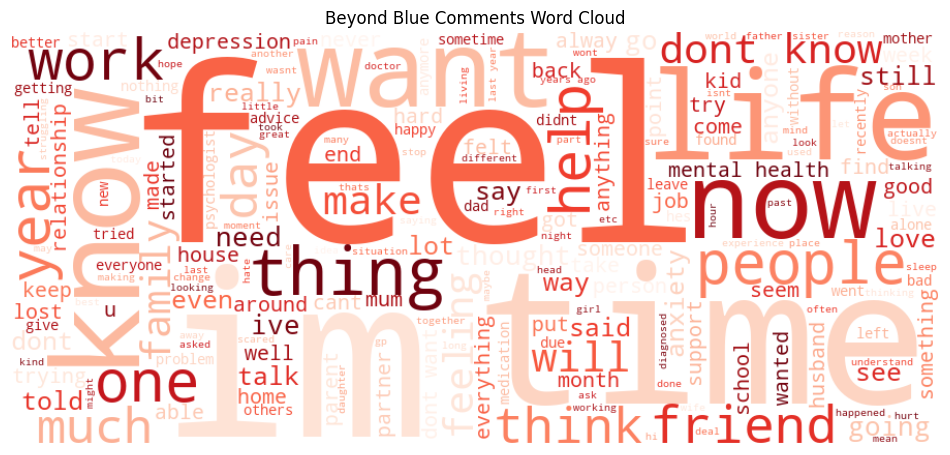

In [20]:
# --- 1. Imports and Paths ---
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- 2. Set Paths ---
bb_data_path = '../Data/Beyond Blue/'    # Change if your folder is named differently!
bb_output_path = '../output/bb_output/'
os.makedirs(bb_output_path, exist_ok=True)

# --- 3. Load Data ---
posts_files = glob.glob(os.path.join(bb_data_path, 'posts_*.csv'))
comments_files = glob.glob(os.path.join(bb_data_path, 'comments_*.csv'))

bb_posts = pd.concat([pd.read_csv(f) for f in posts_files], ignore_index=True)
bb_comments = pd.concat([pd.read_csv(f) for f in comments_files], ignore_index=True)

print("Loaded Beyond Blue posts:", bb_posts.shape)
print("Loaded Beyond Blue comments:", bb_comments.shape)

# --- 4. Clean Data ---
bb_posts_clean = bb_posts.drop_duplicates().dropna(subset=['Post Content'])
bb_comments_clean = bb_comments.drop_duplicates().dropna(subset=['Comment Content'])

# Clean text: lowercase, strip, remove URLs, remove punctuation
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].str.lower().str.strip()
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_posts_clean['Post Content'] = bb_posts_clean['Post Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].str.lower().str.strip()
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'http\S+', '', x))
bb_comments_clean['Comment Content'] = bb_comments_clean['Comment Content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Parse dates
bb_posts_clean['Post Date'] = pd.to_datetime(bb_posts_clean['Post Date'], errors='coerce')
bb_comments_clean['Comment Date'] = pd.to_datetime(bb_comments_clean['Comment Date'], errors='coerce')

# --- 5. Save Cleaned Files ---
bb_posts_clean.to_csv(os.path.join(bb_output_path, 'bb_posts_clean.csv'), index=False)
bb_comments_clean.to_csv(os.path.join(bb_output_path, 'bb_comments_clean.csv'), index=False)

print("Cleaned files saved in bb_output:")
print("- bb_posts_clean.csv")
print("- bb_comments_clean.csv")

# --- 6. Create Sample Files (for supervisor) ---
sample_size = 10
bb_posts_sample = bb_posts_clean.head(sample_size)
bb_comments_sample = bb_comments_clean.head(sample_size)

bb_posts_sample.to_csv(os.path.join(bb_output_path, 'bb_posts_sample.csv'), index=False)
bb_comments_sample.to_csv(os.path.join(bb_output_path, 'bb_comments_sample.csv'), index=False)

with pd.ExcelWriter(os.path.join(bb_output_path, 'bb_samples.xlsx')) as writer:
    bb_posts_sample.to_excel(writer, sheet_name='posts', index=False)
    bb_comments_sample.to_excel(writer, sheet_name='comments', index=False)

print("Sample files saved in bb_output:")
print("- bb_posts_sample.csv")
print("- bb_comments_sample.csv")
print("- bb_samples.xlsx")

# --- 7. Summary Stats ---
print("Total Beyond Blue posts:", bb_posts_clean.shape[0])
print("Total Beyond Blue comments:", bb_comments_clean.shape[0])
print("Post categories:", bb_posts_clean['Category'].unique())
print("Comment categories:", bb_comments_clean['Category'].unique())

# --- 8. Show First Few Rows ---
print("Sample Cleaned Beyond Blue Posts:")
display(bb_posts_clean[['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date', 'Post Content']].head(5))

print("Sample Cleaned Beyond Blue Comments:")
display(bb_comments_clean[['Comment ID', 'Post ID', 'Category', 'Comment Author', 'Comment Date', 'Comment Content']].head(5))

# --- 9. Bar Chart: Posts by Category ---
plt.figure(figsize=(10,5))
bb_posts_clean['Category'].value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Beyond Blue Posts by Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(bb_output_path, 'bb_posts_by_category.png'))
plt.show()

# --- 10. Bar Chart: Comments by Category ---
plt.figure(figsize=(10,5))
bb_comments_clean['Category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Beyond Blue Comments by Category')
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(bb_output_path, 'bb_comments_by_category.png'))
plt.show()

# --- 11. Word Cloud: Posts Content ---
text_posts = ' '.join(bb_posts_clean['Post Content'].dropna())
wordcloud_posts = WordCloud(width=900, height=400, background_color='white', colormap='Blues').generate(text_posts)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.axis('off')
plt.title('Beyond Blue Posts Word Cloud')
plt.savefig(os.path.join(bb_output_path, 'bb_posts_wordcloud.png'))
plt.show()

# --- 12. Word Cloud: Comments Content ---
text_comments = ' '.join(bb_comments_clean['Comment Content'].dropna())
wordcloud_comments = WordCloud(width=900, height=400, background_color='white', colormap='Reds').generate(text_comments)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis('off')
plt.title('Beyond Blue Comments Word Cloud')
plt.savefig(os.path.join(bb_output_path, 'bb_comments_wordcloud.png'))
plt.show()

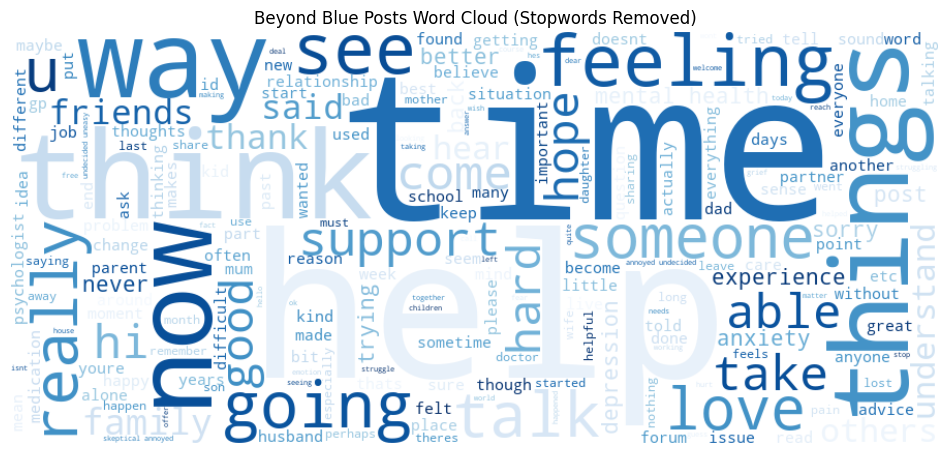

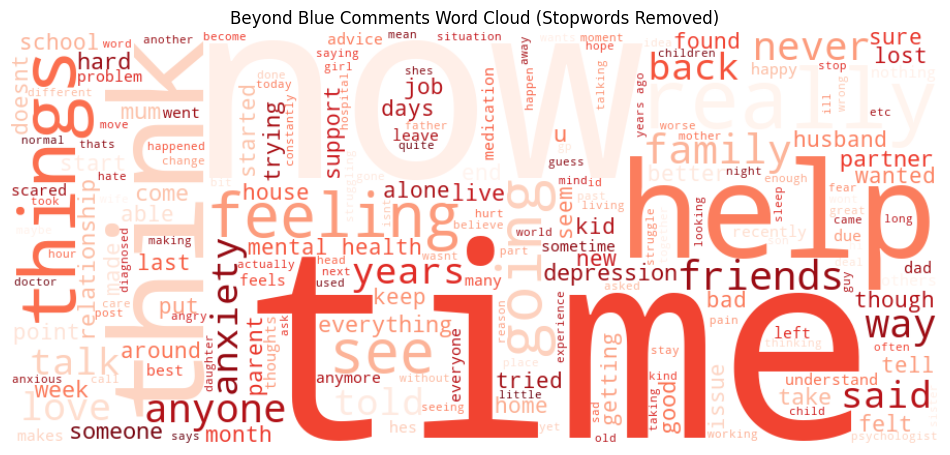

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine standard and custom stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "feel", "know", "thing", "life", "people", "want", "work", "make", "still", "one", "much", "friend", "need", "go", "say", "get", "will",
    "try", "give", "let", "even", "every", "lot", "something", "anything", "first", "also", "well", "year", "day", "thought", "person",
    "always", "find", "right", "look", "got", "im", "ive", "dont", "cant", "didnt", "could", "would", "should", "may", "might"
])

# Posts
text_posts = " ".join(bb_posts_clean['Post Content'].dropna())
wordcloud_posts = WordCloud(width=900, height=400, background_color='white', colormap='Blues', stopwords=custom_stopwords).generate(text_posts)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.axis('off')
plt.title('Beyond Blue Posts Word Cloud (Stopwords Removed)')
plt.savefig('./bb_output/bb_posts_wordcloud_better.png')
plt.show()

# Comments
text_comments = " ".join(bb_comments_clean['Comment Content'].dropna())
wordcloud_comments = WordCloud(width=900, height=400, background_color='white', colormap='Reds', stopwords=custom_stopwords).generate(text_comments)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_comments, interpolation='bilinear')
plt.axis('off')
plt.title('Beyond Blue Comments Word Cloud (Stopwords Removed)')
plt.savefig('./bb_output/bb_comments_wordcloud_better.png')
plt.show()

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned Reddit data
df = pd.read_csv('your_cleaned_data.csv')

# Display the first few rows to confirm loading
df.head()

# 1. Bar Chart: Number of posts per subreddit
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='subreddit', order=df['subreddit'].value_counts().index, palette='viridis')
plt.title('Number of Posts per Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Histogram: Distribution of comments per post
plt.figure(figsize=(8,5))
sns.histplot(df['num_comments'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Comments per Post')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()

# Optional: Show basic statistics
print("Total posts:", len(df))
print("Total comments:", df['num_comments'].sum())
print("Average comments per post:", round(df['num_comments'].mean(), 2))
print("Subreddits:", df['subreddit'].unique())

FileNotFoundError: [Errno 2] No such file or directory: 'your_cleaned_data.csv'

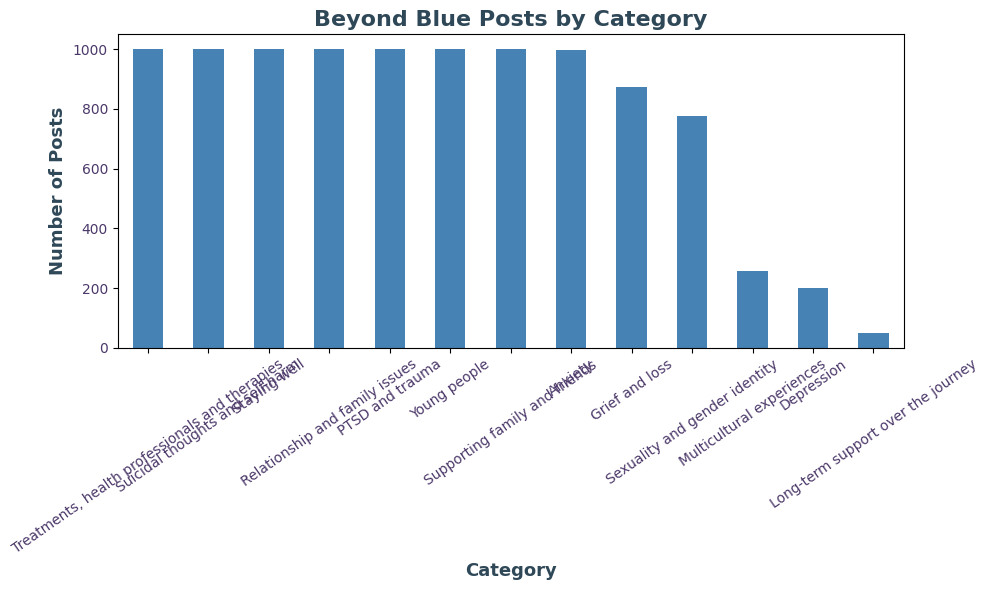

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), facecolor='white')
bb_posts_clean['Category'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Beyond Blue Posts by Category', fontsize=16, fontweight='bold', color='#2F4858')
plt.xlabel('Category', fontsize=13, fontweight='bold', color='#2F4858')
plt.ylabel('Number of Posts', fontsize=13, fontweight='bold', color='#2F4858')
plt.xticks(rotation=35, color='#4B3869')
plt.yticks(color='#4B3869')
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

bb_posts_clean = pd.read_csv('../output/bb_output/bb_posts_clean.csv')  # update path if needed
print(bb_posts_clean.head())

   Post ID Category                              Post Title  \
0   555887  Anxiety            muscle tension crying relief   
1   581593  Anxiety                           burnout & gad   
2   581558  Anxiety                   dreading the new year   
3   581626  Anxiety  should i consider getting a therapist?   
4   581561  Anxiety                       passive agression   

                            Post Author   Post Date  \
0                               Johnny_  2023-01-01   
1  More than my mental health condition  2024-01-01   
2                                 K-J-S  2024-01-01   
3              burntlibraryofalexandria  2024-01-01   
4                                Richju  2024-01-01   

                                        Post Content  Support Count  \
0  hello everyone happy new yearim hoping someone...              0   
1  i feel like i need some support from people in...              0   
2  im wondering if anyone else feels like this i ...              1   
3  eve

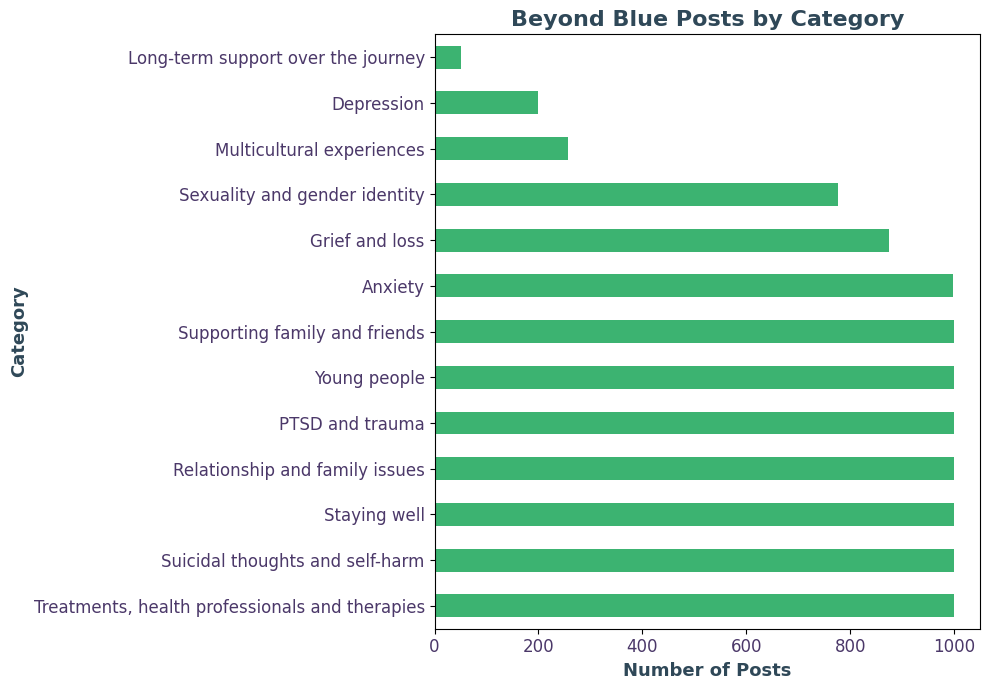

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7), facecolor='white')
bb_posts_clean['Category'].value_counts().plot(kind='barh', color='mediumseagreen')
plt.title('Beyond Blue Posts by Category', fontsize=16, fontweight='bold', color='#2F4858')
plt.xlabel('Number of Posts', fontsize=13, fontweight='bold', color='#2F4858')
plt.ylabel('Category', fontsize=13, fontweight='bold', color='#2F4858')
plt.yticks(color='#4B3869', fontsize=12)
plt.xticks(color='#4B3869', fontsize=12)
plt.tight_layout()
plt.show()

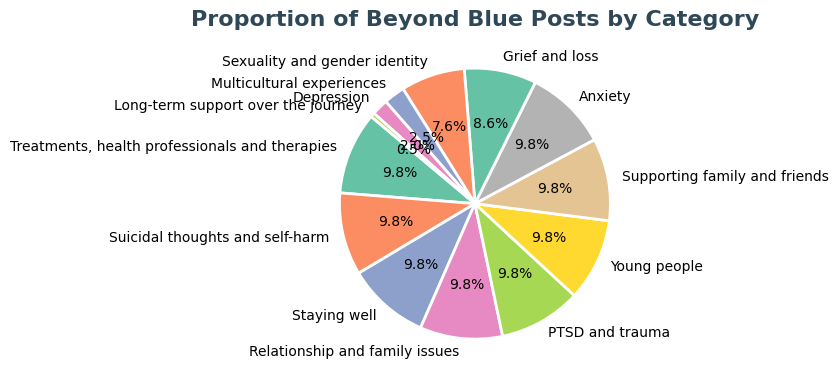

In [7]:
import seaborn as sns

cat_counts = bb_posts_clean['Category'].value_counts()
labels = cat_counts.index
sizes = cat_counts.values
colors = sns.color_palette('Set2', len(labels))

plt.figure(figsize=(8,8), facecolor='white')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        startangle=140, wedgeprops={'edgecolor':'white', 'linewidth':2}, textprops={'fontsize':10})
plt.title('Proportion of Beyond Blue Posts by Category', fontsize=16, fontweight='bold', color='#2F4858')
plt.tight_layout()
plt.show()

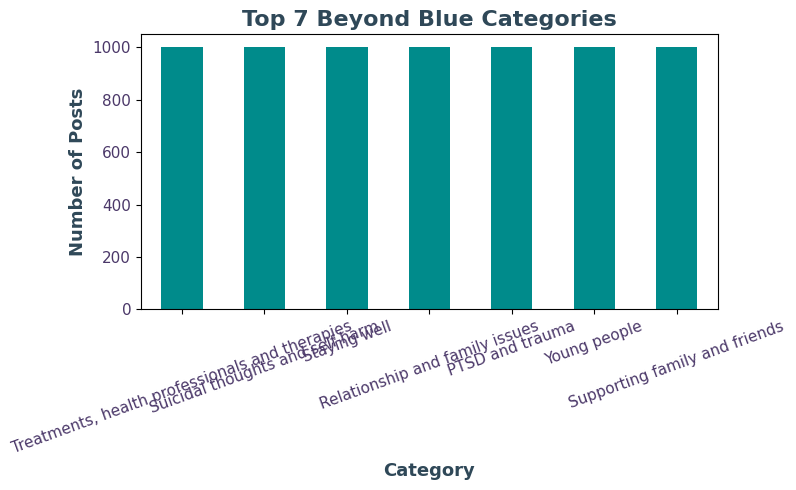

In [8]:
plt.figure(figsize=(8,5), facecolor='white')
bb_posts_clean['Category'].value_counts().head(7).plot(kind='bar', color='darkcyan')
plt.title('Top 7 Beyond Blue Categories', fontsize=16, fontweight='bold', color='#2F4858')
plt.xlabel('Category', fontsize=13, fontweight='bold', color='#2F4858')
plt.ylabel('Number of Posts', fontsize=13, fontweight='bold', color='#2F4858')
plt.xticks(rotation=20, color='#4B3869', fontsize=11)
plt.yticks(color='#4B3869', fontsize=11)
plt.tight_layout()
plt.show()

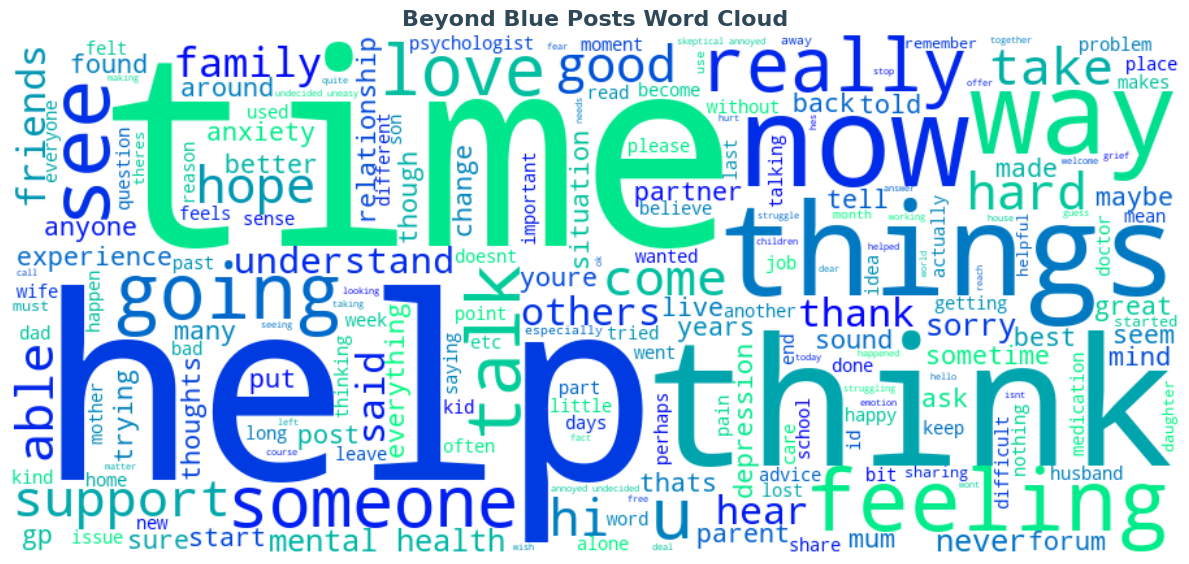

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine standard and custom stopwords to clean up irrelevant words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "feel", "know", "thing", "life", "people", "want", "work", "make", "still", "one", "much", "friend", "need", "go", "say", "get", "will",
    "try", "give", "let", "even", "every", "lot", "something", "anything", "first", "also", "well", "year", "day", "thought", "person",
    "always", "find", "right", "look", "got", "im", "ive", "dont", "cant", "didnt", "could", "would", "should", "may", "might"
])

# Combine all post content into one string
text_posts = " ".join(bb_posts_clean['Post Content'].dropna())

# Create word cloud in a blue/green palette
wordcloud_posts = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='winter',            # blue/green palette
    stopwords=custom_stopwords
).generate(text_posts)

plt.figure(figsize=(12,6), facecolor='white')
plt.imshow(wordcloud_posts, interpolation='bilinear')
plt.axis('off')
plt.title('Beyond Blue Posts Word Cloud', fontsize=16, fontweight='bold', color='#2F4858')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load Beyond Blue data (update filename if needed)
df = pd.read_csv('../output/bb_output/bb_posts_clean.csv')

# --- Tokenization ---
df['tokens'] = df['content'].apply(lambda x: nltk.word_tokenize(str(x)))

# Tokenization Features
df['word_count'] = df['tokens'].apply(len)
df['unique_token_count'] = df['tokens'].apply(lambda x: len(set(x)))
df['top_token'] = df['tokens'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_token'] = df['tokens'].apply(lambda x: 'help' in x)
df['tokens_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['avg_token_length'] = df['tokens'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Lemmatization ---
lemmatizer = nltk.WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])

# Lemmatization Features
df['lemma_count'] = df['lemmas'].apply(len)
df['unique_lemma_count'] = df['lemmas'].apply(lambda x: len(set(x)))
df['top_lemma'] = df['lemmas'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_lemma'] = df['lemmas'].apply(lambda x: 'help' in x)
df['lemmas_text'] = df['lemmas'].apply(lambda x: ' '.join(x))
df['unique_lemma_ratio'] = df.apply(lambda row: row['unique_lemma_count'] / row['lemma_count'] if row['lemma_count'] else 0, axis=1)
df['avg_lemma_length'] = df['lemmas'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Visualization 1: Histogram of Word Counts (Tokenization) ---
plt.figure(figsize=(8, 4))
plt.hist(df['word_count'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel('Words per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Word Counts (Tokenization)')
plt.tight_layout()
plt.show()

# --- Visualization 2: Histogram of Unique Token Counts ---
plt.figure(figsize=(8, 4))
plt.hist(df['unique_token_count'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Unique tokens per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Unique Token Counts')
plt.tight_layout()
plt.show()

# --- Visualization 3: Bar Plot of Top 10 Tokens ---
all_tokens = [token for tokens in df['tokens'] for token in tokens if len(token) > 2]
token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(10)
token_labels, token_values = zip(*top_tokens)
plt.figure(figsize=(7, 4))
plt.barh(token_labels, token_values, color='slateblue')
plt.xlabel('Frequency')
plt.title('Top 10 Tokens')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 4: Word Cloud of Tokens ---
token_text = ' '.join(all_tokens)
token_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(token_text)
plt.figure(figsize=(10,5))
plt.imshow(token_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

# --- Visualization 5: Word Cloud of Lemmatized Words ---
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas if len(lemma) > 2]
lemma_text = ' '.join(all_lemmas)
lemma_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemma_text)
plt.figure(figsize=(10,5))
plt.imshow(lemma_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words (Beyond Blue)')
plt.show()

# --- Visualization 6: Bar Plot of Top 10 Lemmas ---
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(10)
lemma_labels, lemma_values = zip(*top_lemmas)
plt.figure(figsize=(7, 4))
plt.barh(lemma_labels, lemma_values, color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Lemmas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 7: Example Table of Tokens vs. Lemmas and Features ---
sample = df[['tokens', 'lemmas', 'word_count', 'unique_token_count', 'top_token', 'lemma_count', 'unique_lemma_count', 'top_lemma', 'contains_help_token', 'contains_help_lemma', 'unique_lemma_ratio', 'avg_token_length', 'avg_lemma_length']].sample(3, random_state=42)
print("Sample: tokens, lemmas, word_count, unique_token_count, top_token, lemma_count, unique_lemma_count, top_lemma, contains_help_token, contains_help_lemma, unique_lemma_ratio, avg_token_length, avg_lemma_length")
print(sample.to_string(index=False))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


KeyError: 'content'

In [11]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --- Load your posts data ---
df = pd.read_csv('../output/bb_output/bb_posts_clean.csv')

# --- Identify actual text column ---
print("Columns in DataFrame:", df.columns)
# Replace 'body' with your actual text column name if different
text_col_candidates = ['content', 'body', 'text', 'message', 'post_text']
text_col = next((col for col in text_col_candidates if col in df.columns), None)
if text_col is None:
    raise ValueError("No text column found! Available columns: " + str(df.columns))
print(f"Using text column: {text_col}")

# --- Tokenization ---
df['tokens'] = df[text_col].apply(lambda x: nltk.word_tokenize(str(x)))

# --- Tokenization Features ---
df['word_count'] = df['tokens'].apply(len)
df['unique_token_count'] = df['tokens'].apply(lambda x: len(set(x)))
df['top_token'] = df['tokens'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_token'] = df['tokens'].apply(lambda x: 'help' in x)
df['tokens_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['avg_token_length'] = df['tokens'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Lemmatization ---
lemmatizer = nltk.WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])

# --- Lemmatization Features ---
df['lemma_count'] = df['lemmas'].apply(len)
df['unique_lemma_count'] = df['lemmas'].apply(lambda x: len(set(x)))
df['top_lemma'] = df['lemmas'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_lemma'] = df['lemmas'].apply(lambda x: 'help' in x)
df['lemmas_text'] = df['lemmas'].apply(lambda x: ' '.join(x))
df['unique_lemma_ratio'] = df.apply(lambda row: row['unique_lemma_count'] / row['lemma_count'] if row['lemma_count'] else 0, axis=1)
df['avg_lemma_length'] = df['lemmas'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Visualization 1: Histogram of Word Counts (Tokenization) ---
plt.figure(figsize=(8, 4))
plt.hist(df['word_count'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel('Words per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Word Counts (Tokenization)')
plt.tight_layout()
plt.show()

# --- Visualization 2: Histogram of Unique Token Counts ---
plt.figure(figsize=(8, 4))
plt.hist(df['unique_token_count'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Unique tokens per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Unique Token Counts')
plt.tight_layout()
plt.show()

# --- Visualization 3: Bar Plot of Top 10 Tokens ---
all_tokens = [token for tokens in df['tokens'] for token in tokens if len(token) > 2]
token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(10)
token_labels, token_values = zip(*top_tokens)
plt.figure(figsize=(7, 4))
plt.barh(token_labels, token_values, color='slateblue')
plt.xlabel('Frequency')
plt.title('Top 10 Tokens')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 4: Word Cloud of Tokens ---
token_text = ' '.join(all_tokens)
token_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(token_text)
plt.figure(figsize=(10,5))
plt.imshow(token_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

# --- Visualization 5: Word Cloud of Lemmatized Words ---
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas if len(lemma) > 2]
lemma_text = ' '.join(all_lemmas)
lemma_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemma_text)
plt.figure(figsize=(10,5))
plt.imshow(lemma_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words (Beyond Blue)')
plt.show()

# --- Visualization 6: Bar Plot of Top 10 Lemmas ---
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(10)
lemma_labels, lemma_values = zip(*top_lemmas)
plt.figure(figsize=(7, 4))
plt.barh(lemma_labels, lemma_values, color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Lemmas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 7: Example Table of Tokens vs. Lemmas and Features ---
sample = df[['tokens', 'lemmas', 'word_count', 'unique_token_count', 'top_token', 'lemma_count', 'unique_lemma_count', 'top_lemma', 'contains_help_token', 'contains_help_lemma', 'unique_lemma_ratio', 'avg_token_length', 'avg_lemma_length']].sample(3, random_state=42)
print("Sample: tokens, lemmas, word_count, unique_token_count, top_token, lemma_count, unique_lemma_count, top_lemma, contains_help_token, contains_help_lemma, unique_lemma_ratio, avg_token_length, avg_lemma_length")
print(sample.to_string(index=False))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Columns in DataFrame: Index(['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date',
       'Post Content', 'Support Count', 'Total Number of Comments',
       'Post URL'],
      dtype='object')


ValueError: No text column found! Available columns: Index(['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date',
       'Post Content', 'Support Count', 'Total Number of Comments',
       'Post URL'],
      dtype='object')

In [12]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --- Load your posts data ---
df = pd.read_csv('../output/bb_output/bb_posts_clean.csv')

# --- Identify actual text column ---
print("Columns in DataFrame:", df.columns)
# Replace 'body' with your actual text column name if different
text_col_candidates = ['content', 'body', 'text', 'message', 'post_text']
text_col = next((col for col in text_col_candidates if col in df.columns), None)
if text_col is None:
    raise ValueError("No text column found! Available columns: " + str(df.columns))
print(f"Using text column: {text_col}")

# --- Tokenization ---
df['tokens'] = df[text_col].apply(lambda x: nltk.word_tokenize(str(x)))

# --- Tokenization Features ---
df['word_count'] = df['tokens'].apply(len)
df['unique_token_count'] = df['tokens'].apply(lambda x: len(set(x)))
df['top_token'] = df['tokens'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_token'] = df['tokens'].apply(lambda x: 'help' in x)
df['tokens_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['avg_token_length'] = df['tokens'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Lemmatization ---
lemmatizer = nltk.WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])

# --- Lemmatization Features ---
df['lemma_count'] = df['lemmas'].apply(len)
df['unique_lemma_count'] = df['lemmas'].apply(lambda x: len(set(x)))
df['top_lemma'] = df['lemmas'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_lemma'] = df['lemmas'].apply(lambda x: 'help' in x)
df['lemmas_text'] = df['lemmas'].apply(lambda x: ' '.join(x))
df['unique_lemma_ratio'] = df.apply(lambda row: row['unique_lemma_count'] / row['lemma_count'] if row['lemma_count'] else 0, axis=1)
df['avg_lemma_length'] = df['lemmas'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Visualization 1: Histogram of Word Counts (Tokenization) ---
plt.figure(figsize=(8, 4))
plt.hist(df['word_count'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel('Words per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Word Counts (Tokenization)')
plt.tight_layout()
plt.show()

# --- Visualization 2: Histogram of Unique Token Counts ---
plt.figure(figsize=(8, 4))
plt.hist(df['unique_token_count'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Unique tokens per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Unique Token Counts')
plt.tight_layout()
plt.show()

# --- Visualization 3: Bar Plot of Top 10 Tokens ---
all_tokens = [token for tokens in df['tokens'] for token in tokens if len(token) > 2]
token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(10)
token_labels, token_values = zip(*top_tokens)
plt.figure(figsize=(7, 4))
plt.barh(token_labels, token_values, color='slateblue')
plt.xlabel('Frequency')
plt.title('Top 10 Tokens')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 4: Word Cloud of Tokens ---
token_text = ' '.join(all_tokens)
token_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(token_text)
plt.figure(figsize=(10,5))
plt.imshow(token_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

# --- Visualization 5: Word Cloud of Lemmatized Words ---
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas if len(lemma) > 2]
lemma_text = ' '.join(all_lemmas)
lemma_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemma_text)
plt.figure(figsize=(10,5))
plt.imshow(lemma_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words (Beyond Blue)')
plt.show()

# --- Visualization 6: Bar Plot of Top 10 Lemmas ---
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(10)
lemma_labels, lemma_values = zip(*top_lemmas)
plt.figure(figsize=(7, 4))
plt.barh(lemma_labels, lemma_values, color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Lemmas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 7: Example Table of Tokens vs. Lemmas and Features ---
sample = df[['tokens', 'lemmas', 'word_count', 'unique_token_count', 'top_token', 'lemma_count', 'unique_lemma_count', 'top_lemma', 'contains_help_token', 'contains_help_lemma', 'unique_lemma_ratio', 'avg_token_length', 'avg_lemma_length']].sample(3, random_state=42)
print("Sample: tokens, lemmas, word_count, unique_token_count, top_token, lemma_count, unique_lemma_count, top_lemma, contains_help_token, contains_help_lemma, unique_lemma_ratio, avg_token_length, avg_lemma_length")
print(sample.to_string(index=False))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Columns in DataFrame: Index(['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date',
       'Post Content', 'Support Count', 'Total Number of Comments',
       'Post URL'],
      dtype='object')


ValueError: No text column found! Available columns: Index(['Post ID', 'Category', 'Post Title', 'Post Author', 'Post Date',
       'Post Content', 'Support Count', 'Total Number of Comments',
       'Post URL'],
      dtype='object')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aipro\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


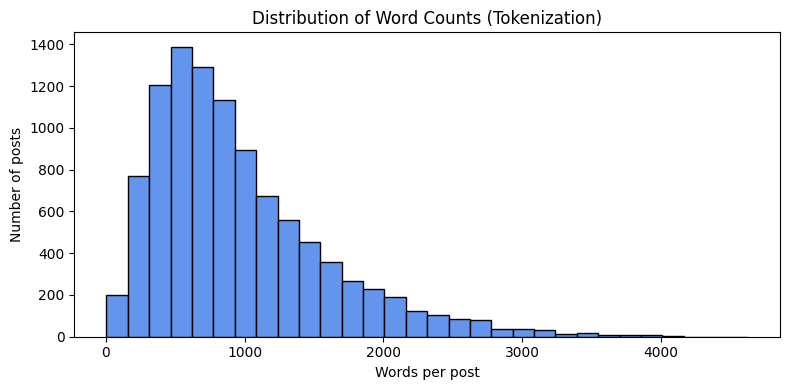

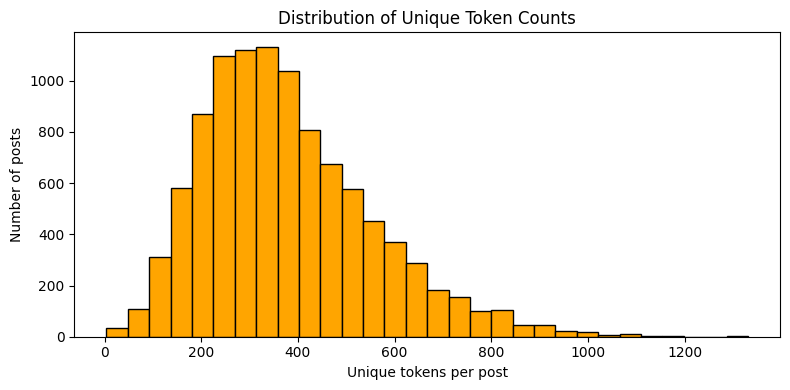

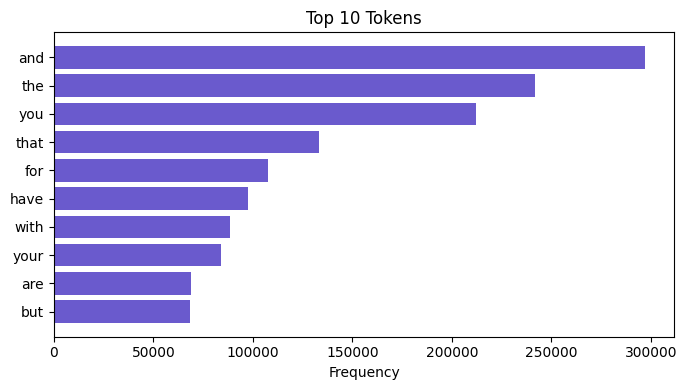

MemoryError: 

In [13]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# --- Load your posts data ---
df = pd.read_csv('../output/bb_output/bb_posts_clean.csv')

# --- Tokenization ---
df['tokens'] = df['Post Content'].apply(lambda x: nltk.word_tokenize(str(x)))

# --- Tokenization Features ---
df['word_count'] = df['tokens'].apply(len)
df['unique_token_count'] = df['tokens'].apply(lambda x: len(set(x)))
df['top_token'] = df['tokens'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_token'] = df['tokens'].apply(lambda x: 'help' in x)
df['tokens_text'] = df['tokens'].apply(lambda x: ' '.join(x))
df['avg_token_length'] = df['tokens'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Lemmatization ---
lemmatizer = nltk.WordNetLemmatizer()
df['lemmas'] = df['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(t) for t in tokens])

# --- Lemmatization Features ---
df['lemma_count'] = df['lemmas'].apply(len)
df['unique_lemma_count'] = df['lemmas'].apply(lambda x: len(set(x)))
df['top_lemma'] = df['lemmas'].apply(lambda x: Counter(x).most_common(1)[0][0] if x else None)
df['contains_help_lemma'] = df['lemmas'].apply(lambda x: 'help' in x)
df['lemmas_text'] = df['lemmas'].apply(lambda x: ' '.join(x))
df['unique_lemma_ratio'] = df.apply(lambda row: row['unique_lemma_count'] / row['lemma_count'] if row['lemma_count'] else 0, axis=1)
df['avg_lemma_length'] = df['lemmas'].apply(lambda x: sum(len(word) for word in x) / len(x) if len(x) > 0 else 0)

# --- Visualization 1: Histogram of Word Counts (Tokenization) ---
plt.figure(figsize=(8, 4))
plt.hist(df['word_count'], bins=30, color='cornflowerblue', edgecolor='black')
plt.xlabel('Words per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Word Counts (Tokenization)')
plt.tight_layout()
plt.show()

# --- Visualization 2: Histogram of Unique Token Counts ---
plt.figure(figsize=(8, 4))
plt.hist(df['unique_token_count'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Unique tokens per post')
plt.ylabel('Number of posts')
plt.title('Distribution of Unique Token Counts')
plt.tight_layout()
plt.show()

# --- Visualization 3: Bar Plot of Top 10 Tokens ---
all_tokens = [token for tokens in df['tokens'] for token in tokens if len(token) > 2]
token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(10)
token_labels, token_values = zip(*top_tokens)
plt.figure(figsize=(7, 4))
plt.barh(token_labels, token_values, color='slateblue')
plt.xlabel('Frequency')
plt.title('Top 10 Tokens')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 4: Word Cloud of Tokens ---
token_text = ' '.join(all_tokens)
token_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(token_text)
plt.figure(figsize=(10,5))
plt.imshow(token_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

# --- Visualization 5: Word Cloud of Lemmatized Words ---
all_lemmas = [lemma for lemmas in df['lemmas'] for lemma in lemmas if len(lemma) > 2]
lemma_text = ' '.join(all_lemmas)
lemma_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemma_text)
plt.figure(figsize=(10,5))
plt.imshow(lemma_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words (Beyond Blue)')
plt.show()

# --- Visualization 6: Bar Plot of Top 10 Lemmas ---
lemma_counts = Counter(all_lemmas)
top_lemmas = lemma_counts.most_common(10)
lemma_labels, lemma_values = zip(*top_lemmas)
plt.figure(figsize=(7, 4))
plt.barh(lemma_labels, lemma_values, color='mediumseagreen')
plt.xlabel('Frequency')
plt.title('Top 10 Lemmas')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Visualization 7: Example Table of Tokens vs. Lemmas and Features ---
sample = df[['tokens', 'lemmas', 'word_count', 'unique_token_count', 'top_token', 'lemma_count', 'unique_lemma_count', 'top_lemma', 'contains_help_token', 'contains_help_lemma', 'unique_lemma_ratio', 'avg_token_length', 'avg_lemma_length']].sample(3, random_state=42)
print("Sample: tokens, lemmas, word_count, unique_token_count, top_token, lemma_count, unique_lemma_count, top_lemma, contains_help_token, contains_help_lemma, unique_lemma_ratio, avg_token_length, avg_lemma_length")
print(sample.to_string(index=False))

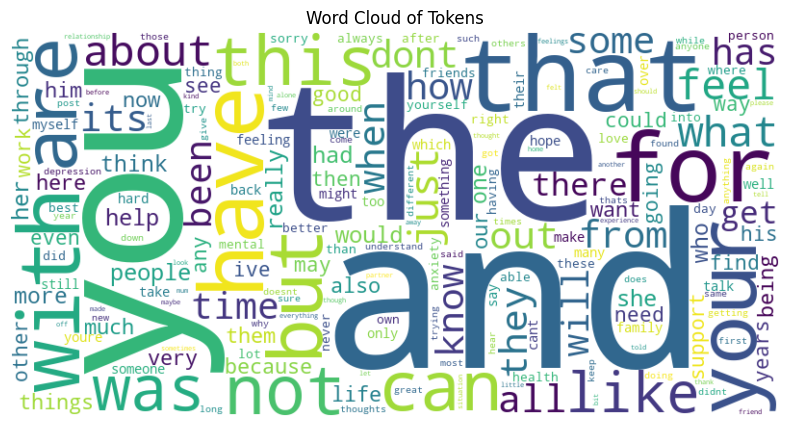

NameError: name 'all_lemmas' is not defined

In [14]:
# --- Visualization 4: Word Cloud of Tokens (fixed for MemoryError) ---
token_counts = Counter(all_tokens)
top_tokens = dict(token_counts.most_common(5000))
token_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tokens)
plt.figure(figsize=(10,5))
plt.imshow(token_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokens')
plt.show()

# --- Visualization 5: Word Cloud of Lemmatized Words (fixed) ---
lemma_counts = Counter(all_lemmas)
top_lemmas = dict(lemma_counts.most_common(5000))
lemma_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_lemmas)
plt.figure(figsize=(10,5))
plt.imshow(lemma_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Words (Beyond Blue)')
plt.show()